# import libraries

In [1]:
import get_data
import numpy as np
import pandas as pd
import regression_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

# get data

In [2]:
data = pd.read_csv('./insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# pre-processing

In [3]:
inspector = get_data.get('./insurance.csv')
by_row,by_feature = inspector.detect_missing_values()

In [4]:
by_feature

,missing count
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [5]:
outliers = inspector.modified_zScore()
outliers

,age,bmi,children,charges
0,1.124167,0.403409,0.6745,1.008357
1,1.180375,0.543795,0.0000,1.028999
2,0.618292,0.419545,1.3490,0.662917
3,0.337250,1.241693,0.6745,1.693715
4,0.393458,0.245273,0.6745,0.741217
...,...,...,...,...
1333,0.618292,0.091977,1.3490,0.163763
1334,1.180375,0.245273,0.6745,0.964431
1335,1.180375,1.040795,0.6745,1.041863
1336,1.011750,0.742273,0.6745,0.991047


In [6]:
# age outliers
outliers[outliers['age']>=3]

,age,bmi,children,charges


In [7]:
# charges outliers
outliers[outliers['charges']>=3]

,age,bmi,children,charges
14,0.674500,1.892795,0.6745,4.062749
19,0.505875,0.790682,0.6745,3.689896
23,0.281042,0.245273,0.0000,3.806069
29,0.449667,0.952045,0.6745,3.941691
30,0.955542,0.839091,0.6745,3.521647
...,...,...,...,...
1301,1.292792,0.076648,1.3490,5.017820
1303,0.224833,0.419545,0.6745,3.823251
1308,0.786917,0.032273,0.6745,3.295200
1313,1.124167,0.693864,0.6745,3.630776


In [8]:
# data.drop(outliers[outliers['charges']>=3].index,axis=0,inplace=True)

In [9]:
# children outliers
outliers[outliers['children']>=3]

,age,bmi,children,charges


In [10]:
# bmi outliers
outliers[outliers['bmi']>=3]

,age,bmi,children,charges
116,1.067958,3.011045,0.6745,0.268697
847,0.899333,3.224045,0.0000,0.933242
1047,0.955542,3.579045,0.0000,4.719896
1317,1.180375,3.667795,0.6745,1.104542


In [11]:
# data cleaning 1 for make more accuracy without outliers - ignore outliers (fail)

# data.drop([116,847,1317],axis=0,inplace=True)
# data

In [12]:
target = data['charges']
data = data.drop(labels='charges',axis=1)

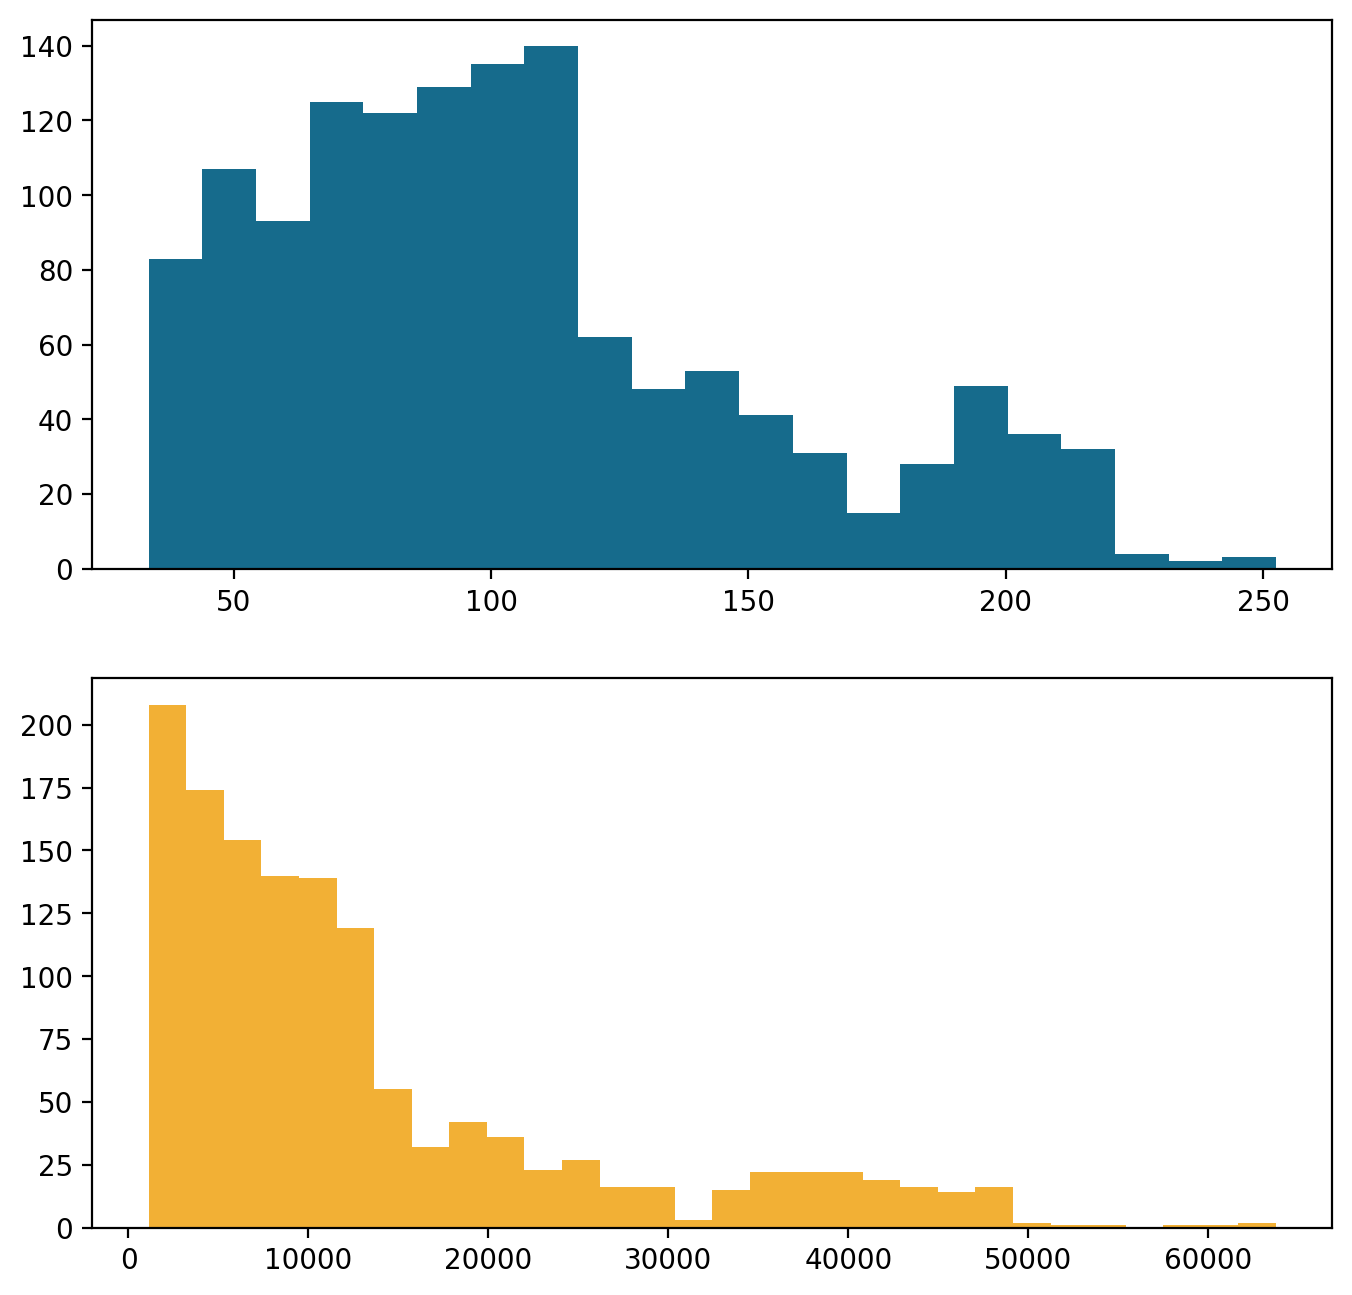

In [13]:
# data clean 2 - transform outliers
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=[8,8],dpi=200)
axs = axes.ravel()
axs[0].hist(np.sqrt(target),bins='auto',color='#166B8C')
axs[1].hist(target,bins='auto',color='#F2B035')
plt.show()

In [14]:
# target = np.log(target)

In [15]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [16]:
vfi = pd.DataFrame()
vfi['features'] = numeric_data.columns
vfi['VFI'] = [variance_inflation_factor(numeric_data.values,i) for i in range(numeric_data.shape[1])]
vfi.sort_values(by='VFI')

,features,VFI
2,children,1.796637
0,age,7.536550
1,bmi,7.846515


In [17]:
full = pd.get_dummies(data)
full.ndim

2

In [18]:
np.ones(full.shape[0]).reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [19]:
full = np.hstack([full,np.ones(full.shape[0]).reshape(-1,1)])
full.shape

(1338, 12)

# modeling

In [20]:
train_x,test_x,train_y,test_y = train_test_split(full,target,test_size=0.2,random_state=42)
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((1070, 12), (1070,), (268, 12), (268,))

In [55]:
weights = regression_model.regression(np.sqrt(train_x),np.sqrt(train_y))
weights

array([ 16.71046525,  11.93261135,   4.25176586,  -8.02565008,
        -9.72654348, -54.04868824,  36.29649468,  -1.41428673,
        -3.84837965,  -6.11938537,  -6.3701418 , -17.75219356])

In [56]:
predict_1 = np.dot(np.sqrt(test_x),weights)
predict_1

array([ 96.74080833,  81.96726629, 202.22547503,  95.86986934,
       145.22522144,  91.94844489,  45.78452723, 121.77346909,
        56.79993661, 102.87642853, 160.28162996,  93.63344309,
        73.20391533, 201.05224511, 208.46849364, 197.73424471,
       114.99591313, 195.43162266,  94.83953351, 178.11960162,
        63.49770104,  95.82411309,  50.73354089,  72.42249245,
       105.12679861, 109.76999272, 113.93709138,  76.31136611,
       100.87593148,  48.75961677,  92.58371802, 109.80255148,
        61.09410981,  68.5138638 ,  66.91879124, 104.43977818,
        55.94293132,  92.88152458, 190.03864297, 178.00862103,
        59.96416699,  64.0669591 , 114.50127792, 103.18916907,
        85.70704772, 107.28485971,  68.11382367,  63.54177073,
       191.20632571,  85.34008655, 118.58265327,  52.16916304,
       103.05945984,  48.94549161, 107.41994279, 108.84898699,
        68.79473053, 175.34998339, 109.71785309, 109.21999838,
       113.72830419,  89.95044701, 121.67465078,  90.27

In [57]:
r2_score(np.sqrt(test_y),predict_1)*100, mean_squared_error(np.sqrt(test_y),predict_1)

(80.939860035233, 462.49007439686613)

In [65]:
weights_gd,cost_history = regression_model.fit(np.sqrt(train_x),np.sqrt(train_y),0.0005,100001)
weights_gd

array([ 16.24024533,   9.19952125,   4.12065945,  -3.99965417,
        -5.66492246, -50.06936988,  40.40479326,   0.16917487,
        -2.08681739,  -3.47377077,  -4.27316334,  -9.66457663])

In [69]:
weights_ridge = regression_model.ridge_fit(np.sqrt(train_x),
                                           np.sqrt(train_y),
                                           0.001,
                                           0.001,
                                           100001)
weights_ridge

array([ 16.67277356,  11.71359836,   4.24125816,  -7.70304237,
        -9.40106316, -53.72968085,  36.62557532,  -1.28740485,
        -3.70722193,  -5.90737718,  -6.20210157, -17.10410553])

In [70]:
weights_lasso = regression_model.lasso_fit(np.sqrt(train_x),
                                           np.sqrt(train_y),
                                           0.001,
                                           0.001,
                                           100001)
weights_lasso

array([ 16.67283138,  11.7138737 ,   4.24127106,  -7.70336943,
        -9.40141174, -53.73032371,  36.62517849,  -1.2874583 ,
        -3.70729374,  -5.90755388,  -6.20221427, -17.10496402])

In [27]:
# optimize alpha
# alpha = np.arange(0,1,0.01)
# alpha_hist = []
#
# for i in range(alpha.shape[0]):
#     w = regression_model.ridge_fit(np.sqrt(train_x),
#                                    np.sqrt(train_y),
#                                    0.01,
#                                    alpha[i],
#                                    10001)
#     alpha_hist.append(w)
#
# alpha_hist

In [28]:
# alpha_hist = np.asarray(alpha_hist)
#
# fig = plt.figure(figsize=[8,8],dpi=200)
# ax = fig.add_subplot(111)
# ax.plot(alpha_hist)
# plt.show()

In [66]:
predict_2 = np.dot(np.sqrt(test_x),weights_gd)
predict_2

array([ 97.3642614 ,  82.02570015, 202.27591292,  96.47614733,
       145.75332473,  89.39982496,  48.62087425, 119.07500247,
        60.62363036, 102.60866137, 162.33309224,  93.2110358 ,
        74.41203717, 198.75302962, 206.24610328, 196.17331021,
       112.40224802, 194.4029714 ,  95.78272593, 178.84836065,
        65.71754465,  95.17583398,  51.84021567,  70.64996387,
       104.93614155, 108.36689025, 112.29243177,  76.42622336,
       101.04728294,  50.53417375,  92.74340992, 108.68860333,
        61.53871455,  71.35831123,  67.64580806, 101.75407053,
        57.80404501,  92.91210903, 191.07463999, 177.7440353 ,
        61.19498896,  64.31758023, 112.68835185, 103.67686032,
        85.25309635, 107.43501494,  67.77852   ,  65.68072194,
       190.40724921,  84.37663678, 117.12221806,  54.00551875,
       100.21919216,  50.69299559, 106.63833472, 107.5633929 ,
        70.14064829, 174.49626861, 108.60249674, 107.71337217,
       112.773657  ,  87.98101935, 119.57926707,  91.23

In [67]:
r2_score(np.sqrt(test_y),predict_2)*100, mean_squared_error(np.sqrt(test_y),predict_2)

(80.83391330922103, 465.06084823619557)

In [71]:
predict_3 = np.dot(np.sqrt(test_x),weights_ridge)
predict_3

array([ 96.79079864,  81.97199362, 202.22927685,  95.91850378,
       145.26735891,  91.74428142,  46.01187772, 121.55727092,
        57.10639262, 102.85501995, 160.44582904,  93.59964979,
        73.30078476, 200.86779674, 208.29019365, 197.60895733,
       114.78811207, 195.34897202,  94.91515752, 178.17777602,
        63.67566009,  95.77222242,  50.82230827,  72.28050841,
       105.11155052, 109.65758254, 113.80532814,  76.32062099,
       100.88969151,  48.90190904,  92.59655697, 109.71331404,
        61.12980628,  68.74184807,  66.97712527, 104.22461291,
        56.09213282,  92.88401669, 190.12142859, 177.98722529,
        60.06286126,  64.08711794, 114.35603213, 103.22829351,
        85.67074198, 107.29693878,  68.0870128 ,  63.71323055,
       191.14209175,  85.26295473, 118.46565413,  52.31640584,
       102.83189783,  49.08560412, 107.35736358, 108.74601182,
        68.90264861, 175.28137414, 109.6285064 , 109.0992932 ,
       113.65183216,  89.7926855 , 121.50678357,  90.35

In [72]:
r2_score(np.sqrt(test_y),predict_3)*100, mean_squared_error(np.sqrt(test_y),predict_3)

(80.9393006522291, 462.5036477015515)

In [73]:
predict_4 = np.dot(np.sqrt(test_x),weights_lasso)
predict_4

array([ 96.79070443,  81.97194895, 202.22951291,  95.91839364,
       145.26749088,  91.74447229,  46.01153605, 121.55750696,
        57.10596164, 102.85500014, 160.44581158,  93.59963941,
        73.3006017 , 200.86822251, 208.29062228, 197.60930958,
       114.78832877, 195.3492887 ,  94.91501576, 178.17792867,
        63.6753615 ,  95.77222931,  50.82211582,  72.28063493,
       105.11154161, 109.65769962, 113.80546618,  76.32056171,
       100.88964439,  48.90163937,  92.59649778, 109.71340368,
        61.12969207,  68.74151674,  66.97697849, 104.22483459,
        56.09188431,  92.88397324, 190.12155681, 177.98743813,
        60.06267354,  64.087022  , 114.35618408, 103.22820524,
        85.67071208, 107.2968771 ,  68.08699256,  63.71295819,
       191.14236403,  85.26297431, 118.46576689,  52.31612964,
       102.83214827,  49.08535341, 107.35738528, 108.7460958 ,
        68.90245126, 175.28165742, 109.62858976, 109.09941999,
       113.65190269,  89.7928234 , 121.50694923,  90.35

In [74]:
r2_score(np.sqrt(test_y),predict_4)*100, mean_squared_error(np.sqrt(test_y),predict_4)

(80.93931120043436, 462.50339175168745)

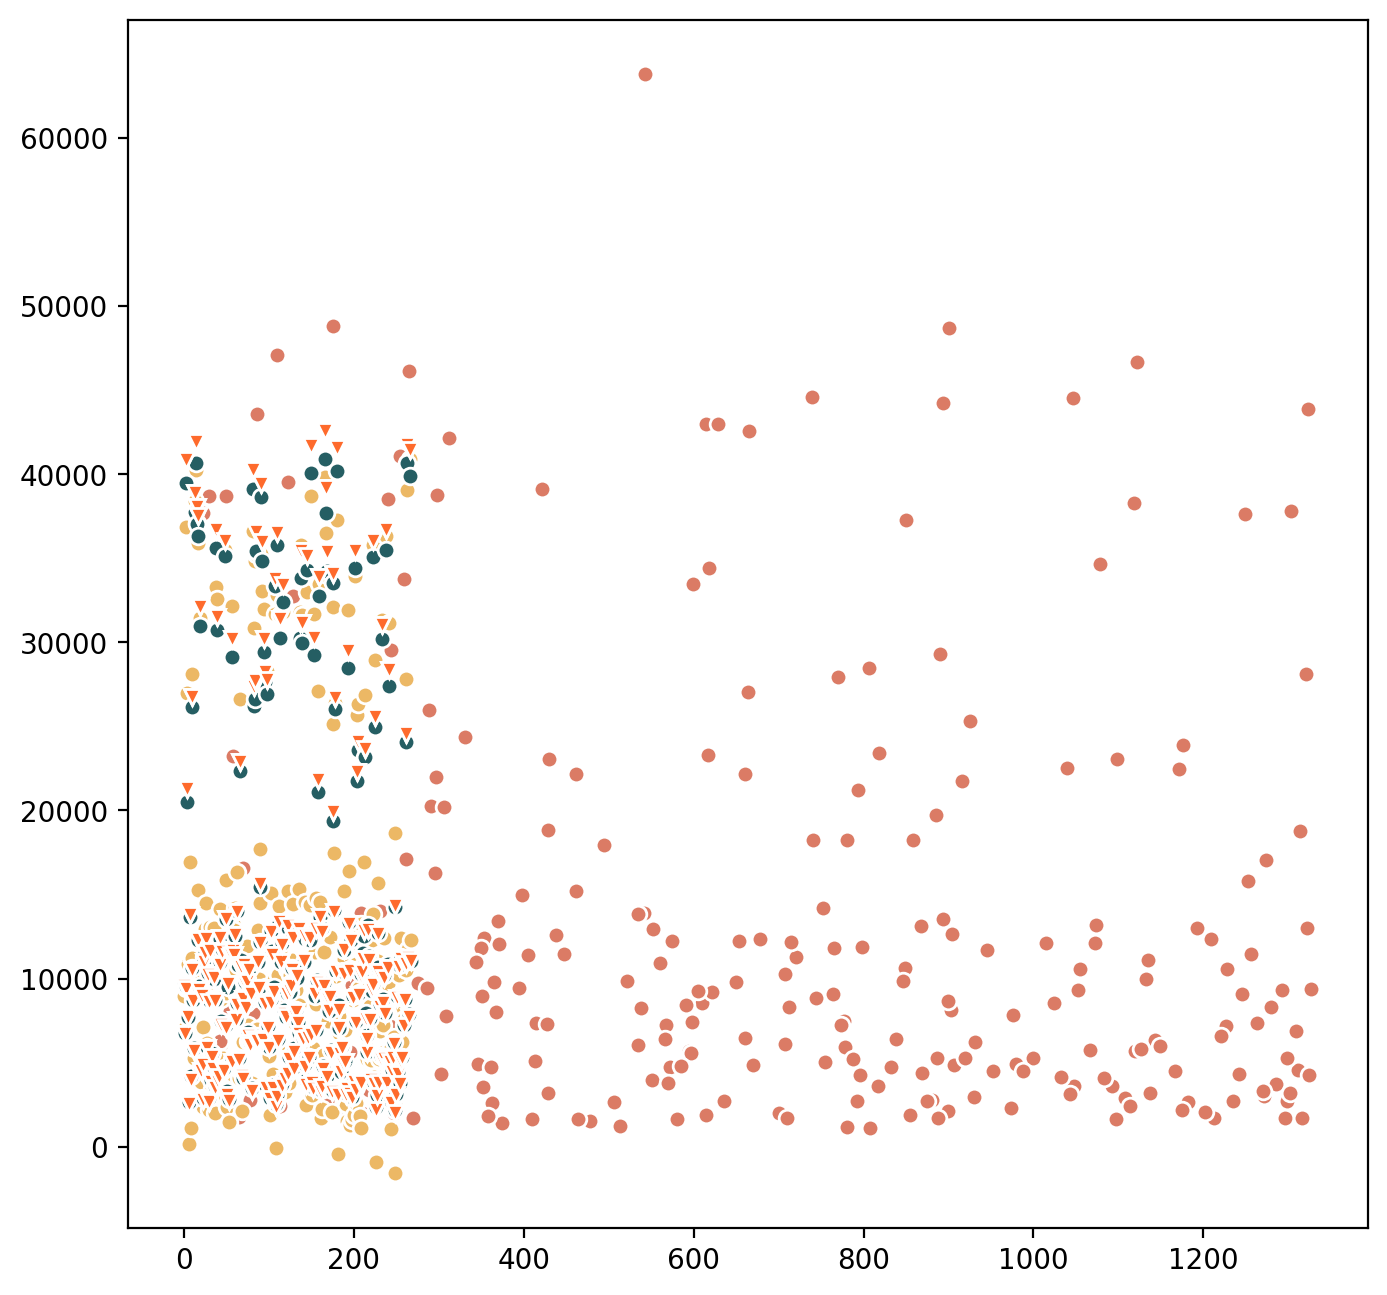

In [35]:
plt.figure(figsize=[8,8],dpi=200)
plt.plot(test_y,'o',color='#DB7B65',markeredgecolor='w')
plt.plot(predict_1,'o',color='#ECB865',markeredgecolor='w')
plt.plot(np.square(predict_2),'o',color='#255E63',markeredgecolor='w')
plt.plot(np.square(predict_3),'v',color='#CF455C',markeredgecolor='w')
plt.plot(np.square(predict_4),'v',color='#FE6A2C',markeredgecolor='w')
plt.show()

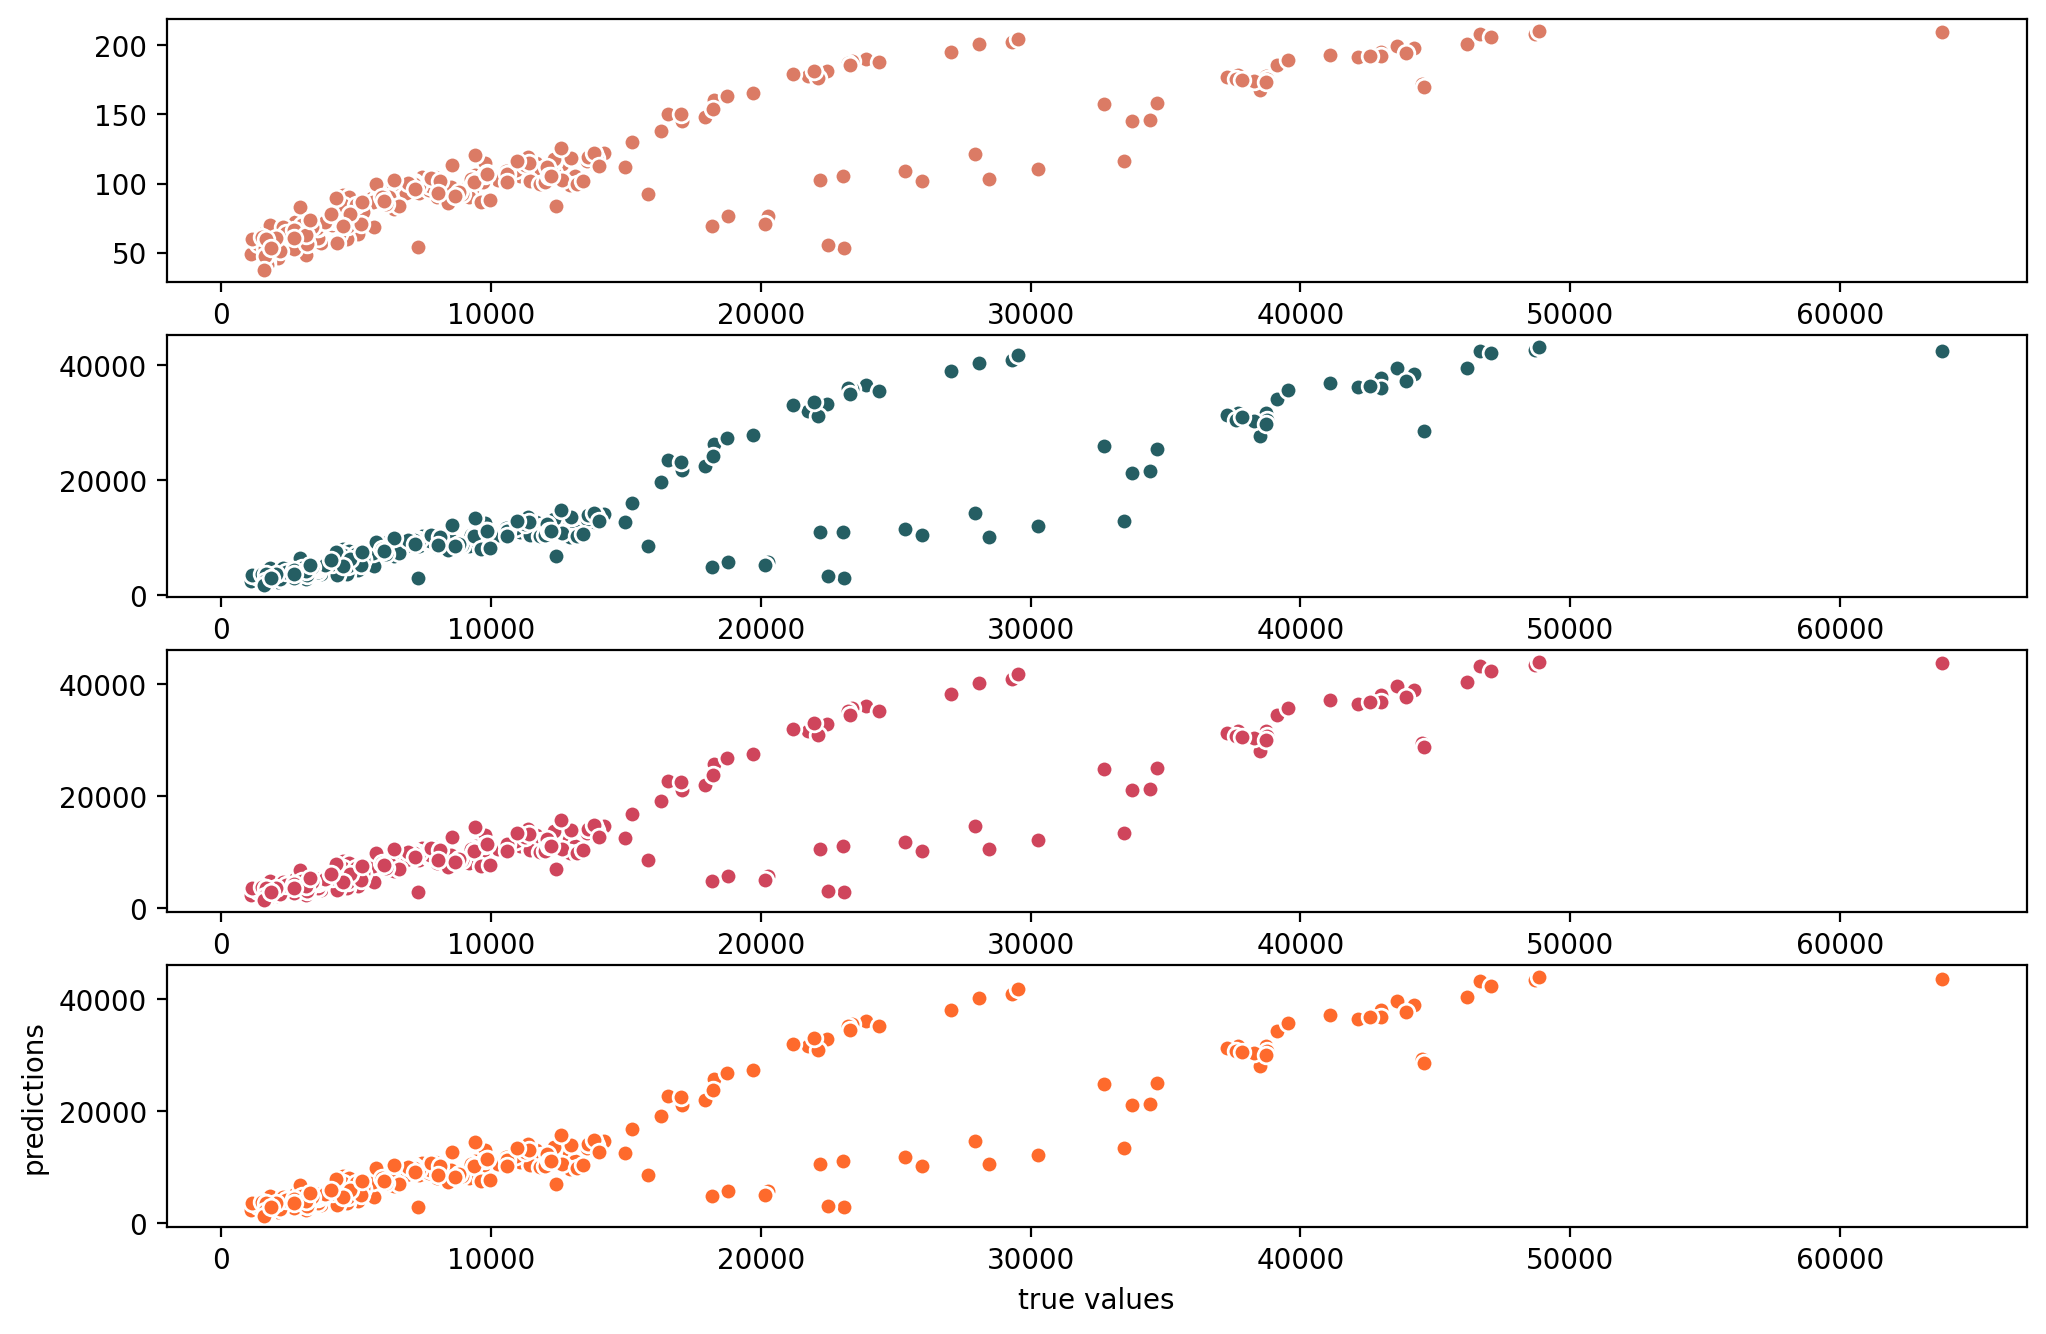

In [88]:
fig,axes = plt.subplots(nrows=4,ncols=1,figsize=[12,8],dpi=200)
axs = axes.ravel()
axs[0].scatter(test_y,predict_1,color='#DB7B65',edgecolor='w')
axs[1].scatter(test_y,np.square(predict_2),color='#255E63',edgecolors='w')
axs[2].scatter(test_y,np.square(predict_3),color='#CF455C',edgecolors='w')
axs[3].scatter(test_y,np.square(predict_4),color='#FE6A2C',edgecolors='w')
plt.xlabel('true values')
plt.ylabel('predictions')
plt.savefig('./demo/nd_compare.jpg')
plt.show()

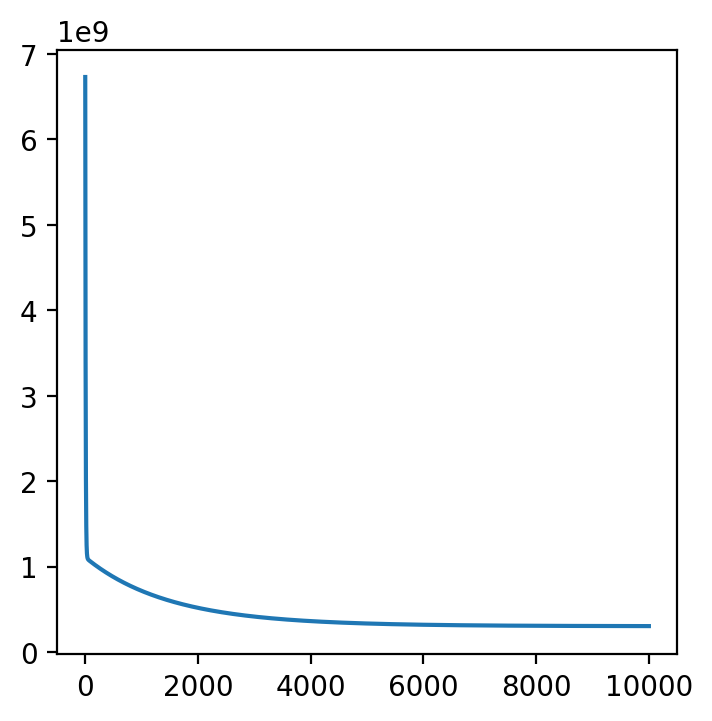

In [37]:
plt.figure(figsize=[4,4],dpi=200)
plt.plot(cost_history)
plt.show()

In [38]:
X = pd.get_dummies(data)
Y = target

train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.2,random_state=42)
train_X.shape,train_Y.shape,test_X.shape,test_Y.shape

((1070, 11), (1070,), (268, 11), (268,))

In [39]:
model_lr = LinearRegression()
model_lr.fit(train_X,train_Y)
model_lr.coef_,model_lr.intercept_

(array([ 2.56975706e+02,  3.37092552e+02,  4.25278784e+02,  9.29584582e+00,
        -9.29584582e+00, -1.18255644e+04,  1.18255644e+04,  4.59585244e+02,
         8.89079180e+01, -1.98279052e+02, -3.50214110e+02]),
 -574.5357125101946)

In [40]:
model_r = Ridge(alpha=0.5)
model_r.fit(train_X,train_Y)
model_r.coef_,model_r.intercept_

(array([ 2.56927434e+02,  3.37045991e+02,  4.25347587e+02,  8.29708823e+00,
        -8.29708823e+00, -1.18084788e+04,  1.18084788e+04,  4.58924561e+02,
         8.79431149e+01, -1.96595436e+02, -3.50272239e+02]),
 -581.4084462440642)

In [41]:
model_l = Lasso(alpha=0.5)
model_l.fit(train_X,train_Y)
model_l.coef_,model_r.intercept_

(array([ 2.56974776e+02,  3.36992081e+02,  4.24983089e+02,  1.62840410e+01,
        -5.95348054e-15, -2.36477687e+04,  2.19806509e-12,  6.53476516e+02,
         2.82645738e+02, -0.00000000e+00, -1.52196505e+02]),
 -581.4084462440642)

In [42]:
p_lr = model_lr.predict(test_X)
r2_score(test_Y,p_lr)*100

78.35929767120723

In [43]:
p_r = model_r.predict(test_X)
r2_score(test_Y,p_r)*100

78.35198730020471

In [44]:
p_l = model_l.predict(test_X)
r2_score(test_Y,p_l)*100

78.35639583407871

# use polynomial functions

In [45]:
transform_x = PolynomialFeatures(2)
X_train_poly = transform_x.fit_transform(train_x)
X_test_poly = transform_x.fit_transform(test_x)

In [84]:
poly_weight = regression_model.regression(X_train_poly,train_y)
poly_weight_gd,cost = regression_model.fit(np.log10(X_train_poly+0.0001),
                                           np.log10(train_y+0.0001),0.0001,100001)
poly_weight_r = regression_model.ridge_fit(np.log10(X_train_poly+0.0001),
                                           np.log10(train_y+0.0001),0.0001,0.001,100001)
poly_weight_l = regression_model.lasso_fit(np.log10(X_train_poly+0.0001),
                                           np.log10(train_y+0.0001),0.0001,0.001,100001)

LinAlgError: Incompatible dimensions

In [76]:
predict_poly = np.dot(X_test_poly,poly_weight)
predict_gd_poly = np.dot(np.log10(X_test_poly+0.0001),poly_weight_gd)
predict_r_poly = np.dot(np.log10(X_test_poly+0.0001),poly_weight_r)
predict_l_poly = np.dot(np.log10(X_test_poly+0.0001),poly_weight_l)

In [77]:
r2_score(np.log10(test_y+0.0001),predict_poly)*100,mean_squared_error(np.log10(test_y+0.0001),predict_poly)

(86.6583090316484, 20712805.987918362)

In [81]:
r2_score(np.log10(test_y+0.0001),predict_gd_poly)*100,mean_squared_error(np.log10(test_y+0.0001),predict_gd_poly)

(80.33592701210077, 0.03334799481736931)

In [82]:
r2_score(np.log10(test_y+0.0001),predict_r_poly)*100,mean_squared_error(np.log10(test_y+0.0001),predict_r_poly)

(81.28809640222535, 0.03173322559297353)

In [83]:
r2_score(np.log10(test_y+0.0001),predict_l_poly)*100,mean_squared_error(np.log10(test_y+0.0001),predict_l_poly)

(81.28792707426157, 0.031733512753627485)

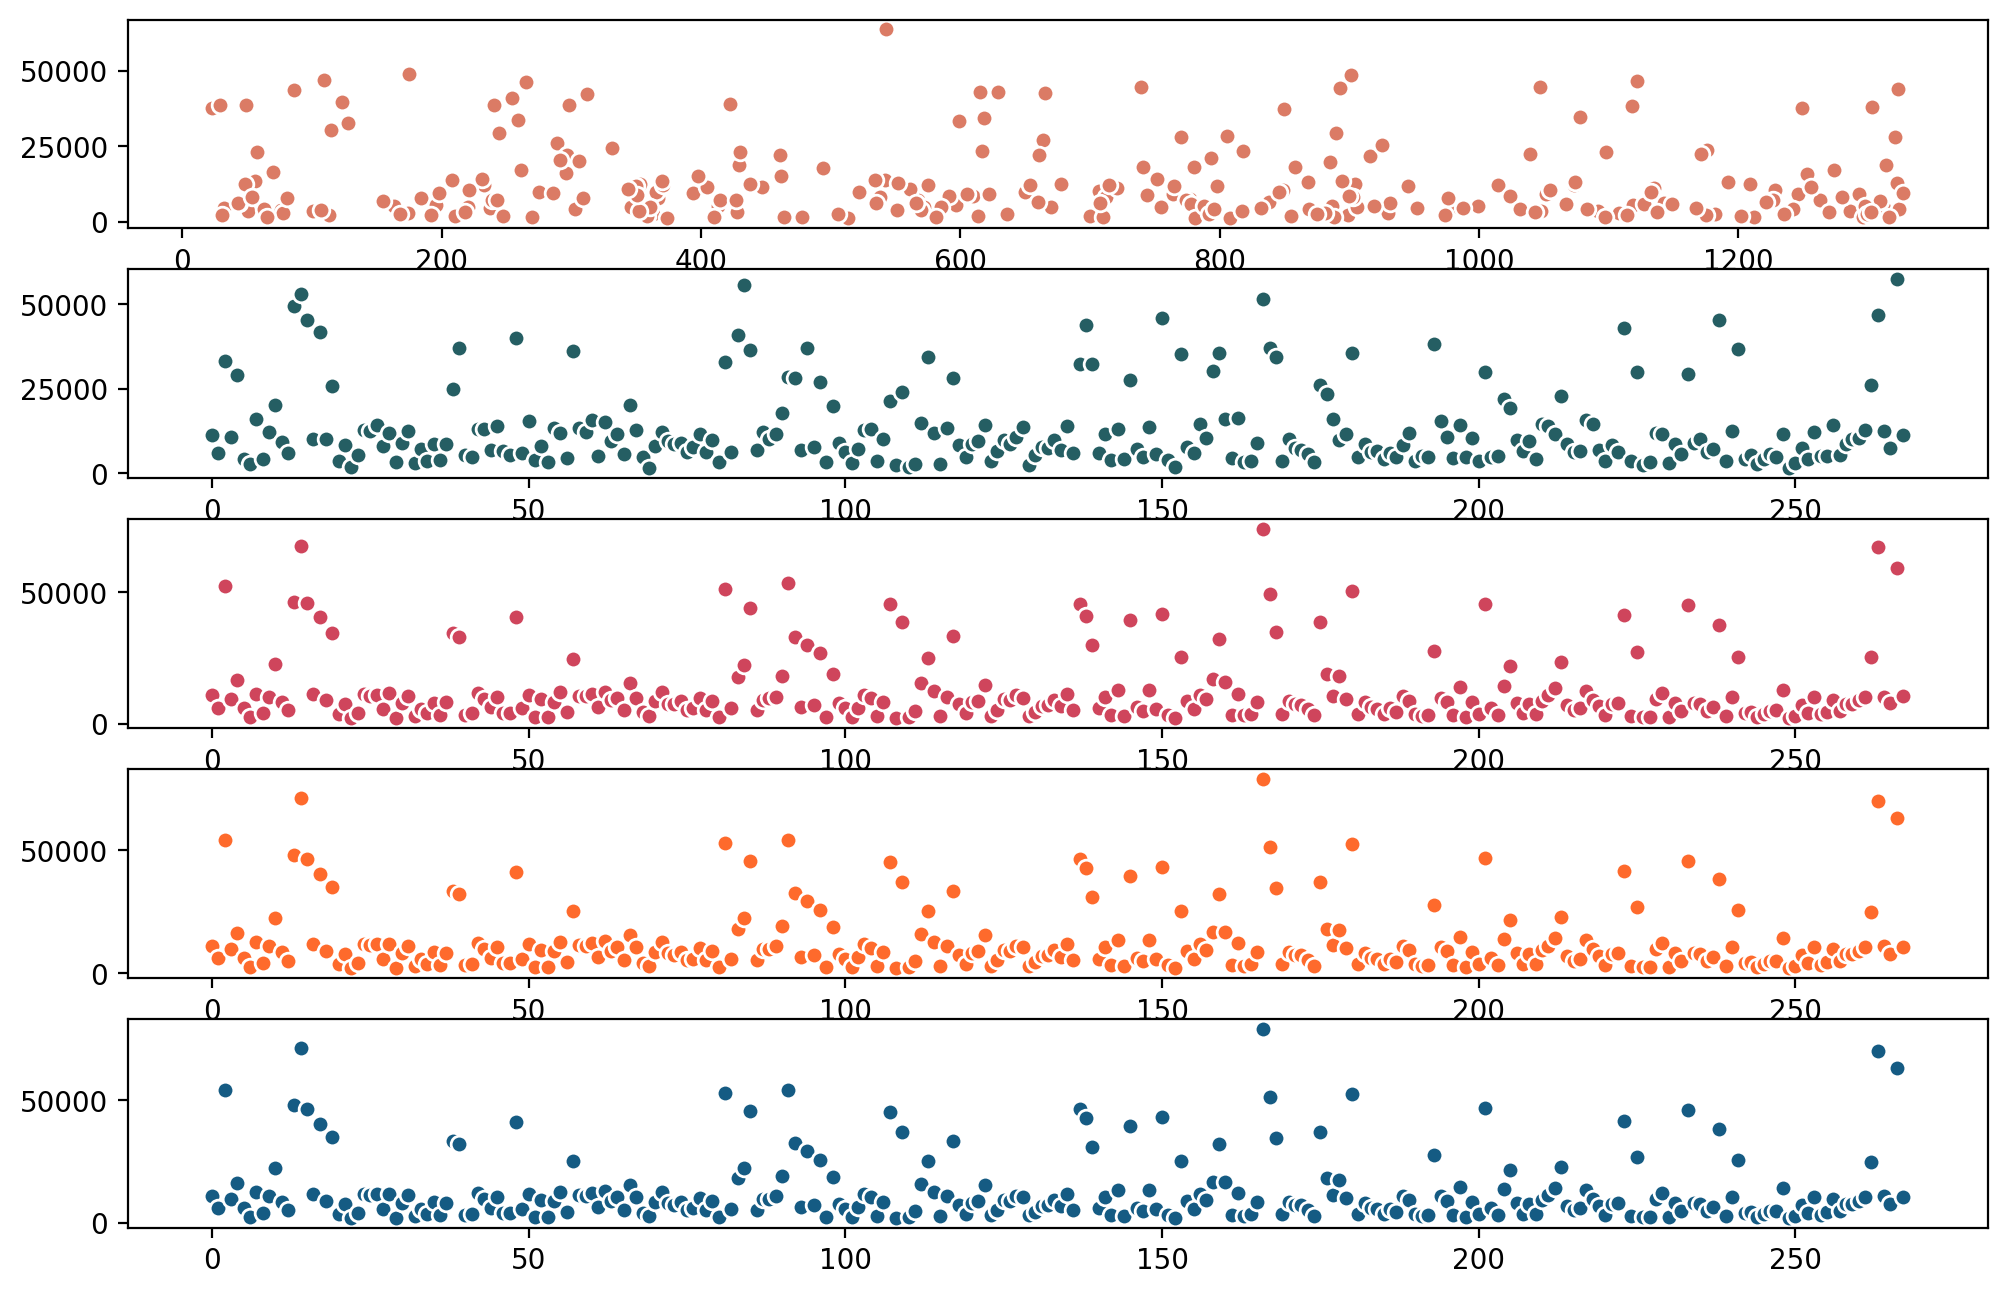

In [87]:
fig,axes = plt.subplots(nrows=5,ncols=1,figsize=[12,8],dpi=200)
axs = axes.ravel()
axs[0].plot(test_y,'o',color='#DB7B65',markeredgecolor='w')
axs[1].plot(predict_poly,'o',color='#255E63',markeredgecolor='w')
axs[2].plot(10**predict_gd_poly,'o',color='#CF455C',markeredgecolor='w')
axs[3].plot(10**predict_r_poly,'o',color='#FE6A2C',markeredgecolor='w')
axs[4].plot(10**predict_l_poly,'o',color='#155B83',markeredgecolor='w')
plt.savefig('./demo/poly_compare.jpg')
plt.show()